# Assignment 1- income

In [145]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [146]:
#upload data set Income2
path='C:/Users/sjun1/Notebook/data/'
filename=path+'Income2.csv'
income=pd.read_csv(filename,usecols=[1,2,3])

In [147]:
income.info
income.head()

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727
3,17.034483,187.586207,78.702806
4,19.931034,20.000000,68.009922


## Explore the data through various figures.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A32F8FEB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000023A34522B38>]], dtype=object)

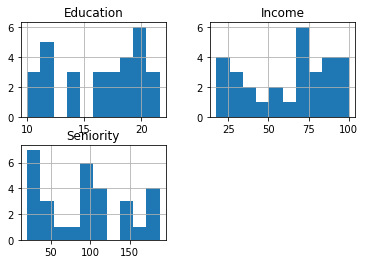

In [148]:
income.hist()

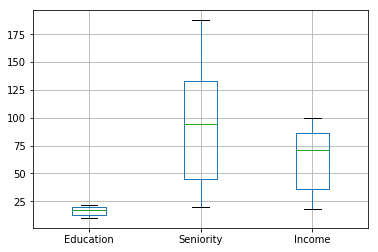

In [149]:
income.boxplot()

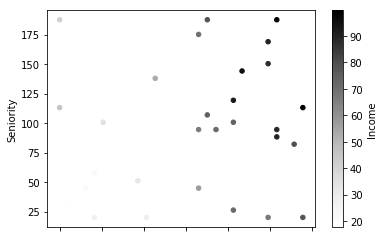

In [150]:
income.plot.scatter(x='Education',y='Seniority',c='Income')

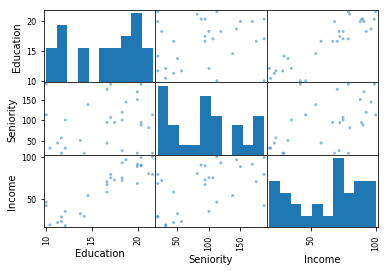

In [151]:
from pandas.plotting import scatter_matrix
scatter_matrix(income);

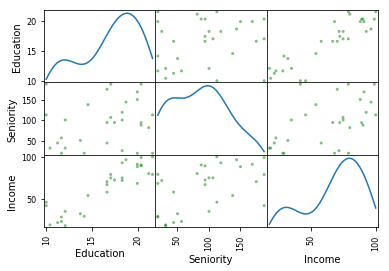

In [152]:
scatter_matrix(income, diagonal = 'kde', c='g');

## Predict “y = Income” as a linear function of “x = Years of Education” using simple linear regression, and predict Income for a new individual with “x = 18”.

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
Ic=LinearRegression()
Ic.fit(X=income[['Education']],y=income['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
# regression parameters intercept is beta0 and coef_ is beta1
print(Ic.intercept_, Ic.coef_)

-41.9166122098 [ 6.38716122]


In [156]:
#predict Income for a new individual with “x = 18”
Ic.predict(X=18)

array([ 73.0522897])

## Show the scatter plot of Income versus Years of Education, and add the fitted line over the scatter plot.   

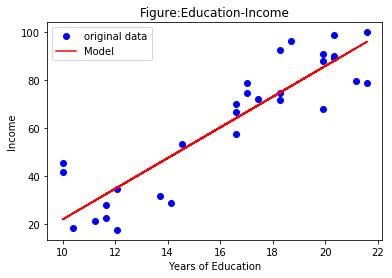

In [157]:
plt.plot(income['Education'],income['Income'],'bo',label='original data')
plt.plot(income['Education'],income['Education']*Ic.coef_+Ic.intercept_,'-r',label='Model')
plt.xlabel("Years of Education")
plt.ylabel("Income")
plt.title("Figure:Education-Income")
plt.legend()

## Predict “y = Income” as a linear function of “x1 = Years of Education” and “x2 = Seniority” for a new individual with (x1 = 18, x2 = 60)

In [158]:
Ic.fit(X=income[['Education','Seniority']],y=income['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [159]:
# regression parameters intercept is beta0 and coef_ are beta1 and beta2
print(Ic.intercept_, Ic.coef_)
intercept=Ic.intercept_
coef=Ic.coef_

-50.0856387547 [ 5.89555596  0.17285547]


In [160]:
# predict a new individual with (x1=18,x2=60)
ind=np.array([18,60]).reshape(1,2)
print(Ic.predict(ind))

[ 66.4056967]


## Discuss “Years of Education” is a stronger predictor of “Income”  or “Seniority”? Why?

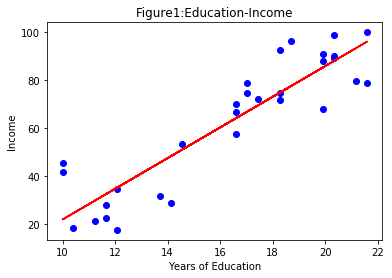

In [161]:
Ic.fit(X=income[['Education']],y=income['Income'])
plt.plot(income['Education'],income['Income'],'bo')
plt.plot(income['Education'],income['Education']*Ic.coef_+Ic.intercept_,'-r')
plt.xlabel("Years of Education")
plt.ylabel("Income")
plt.title("Figure1:Education-Income")

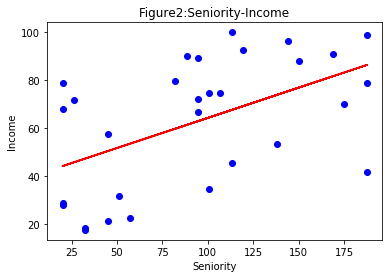

In [162]:
Ic.fit(X=income[['Seniority']],y=income['Income'])
plt.plot(income['Seniority'],income['Income'],'bo')
plt.plot(income['Seniority'],income['Seniority']*Ic.coef_+Ic.intercept_,'-r')
plt.title("Figure2:Seniority-Income")
plt.xlabel("Seniority")
plt.ylabel("Income")

In [163]:
import statsmodels.formula.api as smf
model=smf.ols(formula='Income~Education+Seniority',data=income)
ir=model.fit()
ir.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     191.4
Date:                Thu, 05 Apr 2018   Prob (F-statistic):           1.13e-16
Time:                        15:43:57   Log-Likelihood:                -100.15
No. Observations:                  30   AIC:                             206.3
Df Residuals:                      27   BIC:                             210.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.0856      5.999     -8.349      0.000     -62.394     -37.777
Education      5.8956      0.357     16.513      0.000       5.163       6.628
Seniority      0.1729      0.024      7.079      0.000       0.123       0.223
==============================================================================
Omnibus:                        3.352   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.672
Skew:                           0.729   Prob(JB):                        0.263
Kurtosis:                       2.892   Cond. No.                         502.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""